# Graphing Sine and Cosine Functions

In [1]:
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt

%matplotlib inline 

In [17]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)

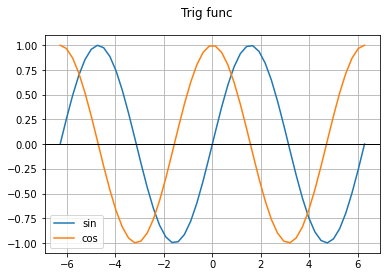

In [18]:
fig, ax = plt.subplots()
fig.suptitle('Trig func')
ax.plot(x, np.sin(x), label='sin')
ax.plot(x, np.cos(x), label='cos')
ax.axhline(0, color='black', lw=1)
ax.legend()
ax.grid(True)


## Funcs

In [18]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    """
    author: Scott Centoni
    https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib
    """
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    """
    author: Scott Centoni
    https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib
    """    
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

def xy(x:np.array , y:[np.array], legends: [str], title: str):
    fig, ax = plt.subplots()
    fig.suptitle(title)
    for y1, lg1 in zip(y, legends):
        ax.plot(x, y1, label=lg1)
    ax.axhline(0, color='black', lw=1)
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

def sinusoidal(func, x, a = 1., b = 1., c = 0., d = 0.):
    """
    sinusoidal funcs
    y = Asin(Bx − C) + D and y = Acos(Bx − C) + D
    """
    return a * func(b * x - c) + d

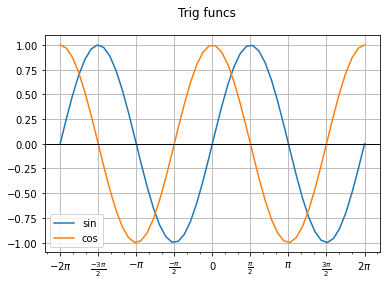

In [26]:
xy(x , [np.sin(x), np.cos(x)], ['sin', 'cos'], 'Trig funcs')

## Period
Period P = 2 pi / | B |

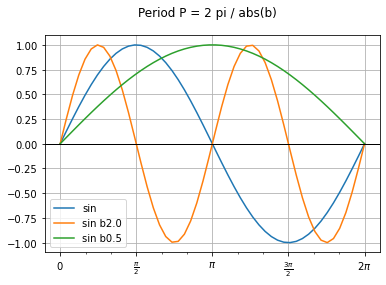

In [35]:
x = np.linspace(0, 2*np.pi, 50)
y0 = np.sin(x)
b1 = 2.
y1 = sinusoidal(np.sin, x, a = 1., b = b1, c = 0., d = 0.)
b2 = 1/2
y2 = sinusoidal(np.sin, x, a = 1., b = b2, c = 0., d = 0.)
xy(x , [y0, y1, y2], ['sin', f'sin b{b1}', f'sin b{b2}'], 'Period P = 2 pi / abs(b)')

## Amplitude
Amplitude A = | A | = 0.5 (max(y) - min(y))

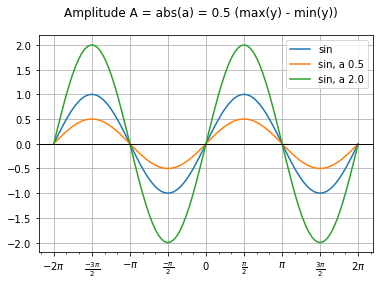

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y0 = np.sin(x)
a1 = 0.5
y1 = sinusoidal(np.sin, x, a = a1)
a2 = 2.
y2 = sinusoidal(np.sin, x, a = a2)
xy(x , [y0, y1, y2], ['sin', f'sin, a {a1}', f'sin, a {a2}'], 'Amplitude A = abs(a) = 0.5 (max(y) - min(y))')

## Phase shift

Phase shift = C/B <br>
If C > 0, the graph shifts to the right. If C < 0, the graph shifts to the left. <br>
The greater the value of | C |, the more the graph is shifted

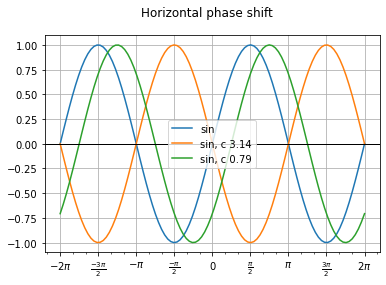

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y0 = np.sin(x)
c1 = np.pi
y1 = sinusoidal(np.sin, x, c = c1)
c2 = 0.25 * np.pi
y2 = sinusoidal(np.sin, x, c = c2)
xy(x , [y0, y1, y2], ['sin', f'sin, c {c1:0.2f}', f'sin, c {c2:0.2f}'], 'Horizontal phase shift')

Any value of D other than zero shifts the graph up or down

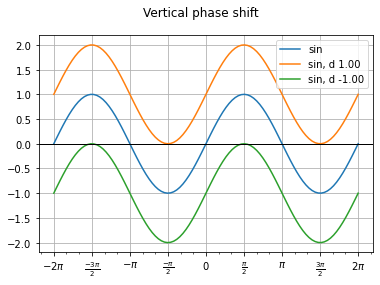

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y0 = np.sin(x)
d1 = 1
y1 = sinusoidal(np.sin, x, d = d1)
d2 = -1
y2 = sinusoidal(np.sin, x, d = d2)
xy(x , [y0, y1, y2], ['sin', f'sin, d {d1:0.2f}', f'sin, d {d2:0.2f}'], 'Vertical phase shift')

## 1.- Finding the components of circular motion
A point rotates around a circle of radius 3 centered at the origin. Sketch a graph of the x, y coordinates of the point as a function of the angle of rotation.

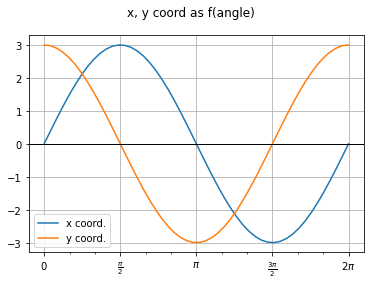

In [15]:
r = 3.
x = np.linspace(0, 2*np.pi, 50)
x0 = r * np.cos(x)
y0 = r * np.sin(x)
xy(x , [y0, x0, y0], ['x coord.', 'y coord.'], 'x, y coord as f(angle)')

Text(0.5, 1.0, 'Circular motion')

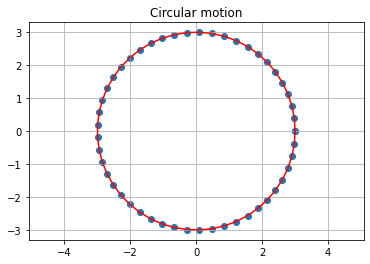

In [16]:
plt.scatter(x0, y0)
plt.plot(x0, y0, 'red')
plt.grid()
plt.axis('equal')
plt.title('Circular motion')

## 2.-Finding the components of circular motion
A circle with radius 3 ft is mounted with its center 4 ft off the ground. The point closest to the ground is labeled P, as shown in Figure 23. Sketch a graph of the height above the ground of the point P as the circle is rotated; then find a function that gives the height in terms of the angle of rotation.<br>
<img src='circular_motion.png' width="200" height="200">

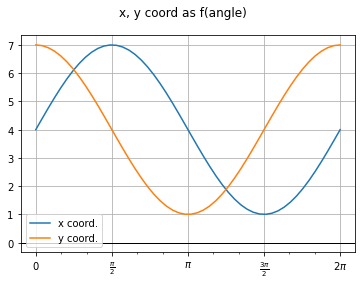

In [22]:
r = 3.
d = 4
x = np.linspace(0, 2*np.pi, 50)
x0 = sinusoidal(np.cos, x, a = r, d=d)
y0 = sinusoidal(np.sin, x, a = r, d=d)
xy(x , [y0, x0, y0], ['x coord.', 'y coord.'], 'x, y coord as f(angle)')

Text(0.5, 1.0, 'Circular motion')

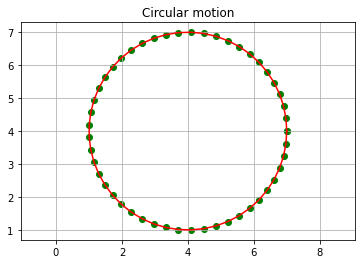

In [28]:
plt.scatter(x0, y0, color='green')
plt.plot(x0, y0, 'red')
plt.grid()
plt.axis('equal')
plt.title('Circular motion')

## Spring
A weight is attached to a spring that is then hung from a board, as shown in Figure below. As the spring oscillates up and down, the position y of the weight relative to the board ranges from −1 in. (at time x = 0) to −7 in. (at time x = π) below the board. Assume the position of y is given as a sinusoidal function of x. Sketch a graph of the function, and then find a cosine function that gives the position y in terms of x.<br>

<img src='trig_funcs_spring.png' width="200" height="200">


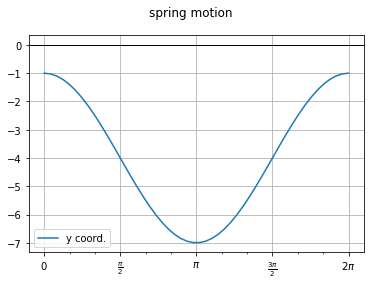

In [42]:
r = 3. ; d = -4
x = np.linspace(0, 2*np.pi, 50)
y = sinusoidal(np.cos, x, a = r, d=d)
xy(x , [y,], ['y coord.', ], 'spring motion')